## DBSCAN With Multiscale Clusters

#### Sam Laudon
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Ademide Mabadeje, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/ademidemabadeje/)




_____________________


### Executive Summary
The challenge with DBSCAN is that it is sensitive to feature's variances and can misclassify clusters. The scope of this project is to investigate when DBSCAN starts to misclassify clusters and how to correct that problem. I have learned that there is an optimum radius and number of minimum samples depending on the feature variance to get the best cluster results. My recommendation would be to toggle these hyperparameters based on the variance of the features to achieve the best clusters, and this is discussed as well at the end of the workflow.


### Project Workflow

Part 1 investigates DBSCAN for three known datasets with increasing variances. Each dataset will contain dimensionless features noted as X and Y. The three datasets are created in this workflow, followed by the model hyperparameter analysis to determine when cluster misclassifications develop as variance is increased. 

Part 2 investigates DBSCAN for two known datasets as they converge. One of the datasets used will be taken from Part 1, and the second dataset will be created in this section. The datasets will converge as feature X in dataset two approaches feature X for dataset one. This is used to see when cluster misclassifications develop as datasets become increasingly similar. 

### Import Packages

In [1]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import matplotlib.pyplot as plt           # for plotting
from sklearn.neighbors import NearestNeighbors # nearest neighbours function to calculate eps hyperparameter
from sklearn.cluster import DBSCAN        # DBSCAN clustering

### Part 1, Varrying Standard Deviations
In this section, I will investigate DBSCAN's limitations for three data groups of increasing standard deviations. To keep the problem simple, I will use dimensionless features, X and Y.

### Initiating Mean And Standard Deviation For Three Data Groups
The different means are just used to separate the data groups when plotted. Their numerical value for this part of the project is irrelevant. However, the increasing standard deviations are important when implementing DBSCAN. These values can be adjusted to research the ideal model hyperparameters for different cases.

In [2]:
#Initializing the mean, M, and the standard deviation, std, for each of the three groups.
#Data Group 1
M1 = 10                                   
std1 = 1                                  

#Data Group 2
M2 = 30                                   
std2 = 2 

#Data Group 3
M3 = 50                                   
std3 = 3                                  

### Initialization Of The Data Frame Containing All Three Data Groups, Plot For Visualization
I set the random seed prior to generating random numbers used to create each of the corresponding X and Y points. The data groups are created separately and then combined into a single dataframe for convenience. 

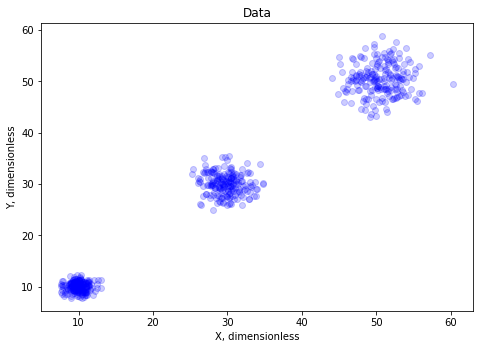

In [3]:
np.random.seed(210)                       #Random seed for replicating results

#Initializing Data Group 1
X1 = np.random.normal(M1, std1, (200))    
Y1 = np.random.normal(M1, std1, (200))    
df1 = pd.DataFrame({'X': X1, 'Y': Y1})    

#Initializing Data Group 2
X2 = np.random.normal(M2, std2, (200))    
Y2 = np.random.normal(M2, std2, (200))    
df2 = pd.DataFrame({'X': X2, 'Y': Y2})    

#Initializing Data Group 3
X3 = np.random.normal(M3, std3, (200))    
Y3 = np.random.normal(M3, std3, (200))    
df3 = pd.DataFrame({'X': X3, 'Y': Y3})    

#Set of Code Used For Combining the Data Groups into One Data Frame, df
df4 = df1.append(df2, ignore_index=True)  
df = df4.append(df3, ignore_index=True)  
                                                      
# plot the Data Frame, df, to visualize distribution
cmap = plt.cm.inferno                   
col = ['X', 'Y']
plt.subplot(111)
plt.scatter(df[col[0]],df[col[1]],color = 'blue',alpha = 0.2,cmap = cmap,vmin = 1, vmax = 4)
xlabel = 'X, dimensionless'
ylabel = 'Y, dimensionless'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('Data')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1, top=1, wspace=0.2, hspace=0.2)

From this point forward in Part 1 of the project, the dataset with the mean of 10, 30, and 50 will be referred to as data group 1, 2, and 3 respecively.  

### Plot of Nearest Neighbor, Results with Incorrect Assumptions
The nearest neighbor plot is used to find the optimal radius to use in DBSCAN by taking the Y value at the elbow of the curve. This is useful when assuming variance stationarity. However, in most cases variance cannot be assumed to be constant. The next two steps in the workflow show why this is not a good method for dataframes with varrying variance. 

The following code block is from Professor Michael Pyrcz (@GeostatsGuy), SubsurfaceDataAnalytics_advanced_clustering.ipynb from GeostatsGuy GitHub.

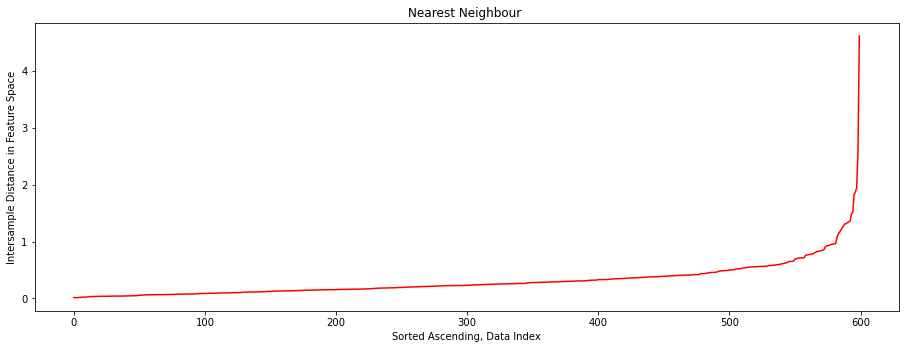

In [4]:
neigh = NearestNeighbors(n_neighbors=2,radius=999.0,algorithm='kd_tree')
nbrs = neigh.fit(df.values)
distances, indices = nbrs.kneighbors(df.values)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances, c = 'red'); plt.xlabel('Sorted Ascending, Data Index'); plt.ylabel('Intersample Distance in Feature Space')
plt.title('Nearest Neighbour ')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.00, wspace=0.2, hspace=0.2)

In the nearest neighbor plot above, the elbow appears to occur at an intersample distance of approximately 1. This hyperparameter be used for the radius in the initial DBSCAN calculation when incorrectly assuming variance stationarity.

### DBSCAN For Data Frame with Incorrect Assumptions
In this set of code, DBSCAN is implimented. It assigns clusters based on sample density, requires a minimum number of samples within a given radius (eps) to form a cluster, non-exhaustive, and mutually exclusive

Again, the eps in this scenario is for an incorrect assumption of constant variance, and this is visualized below.

The following code block is from Professor Michael Pyrcz (@GeostatsGuy), SubsurfaceDataAnalytics_advanced_clustering.ipynb from GeostatsGuy GitHub.

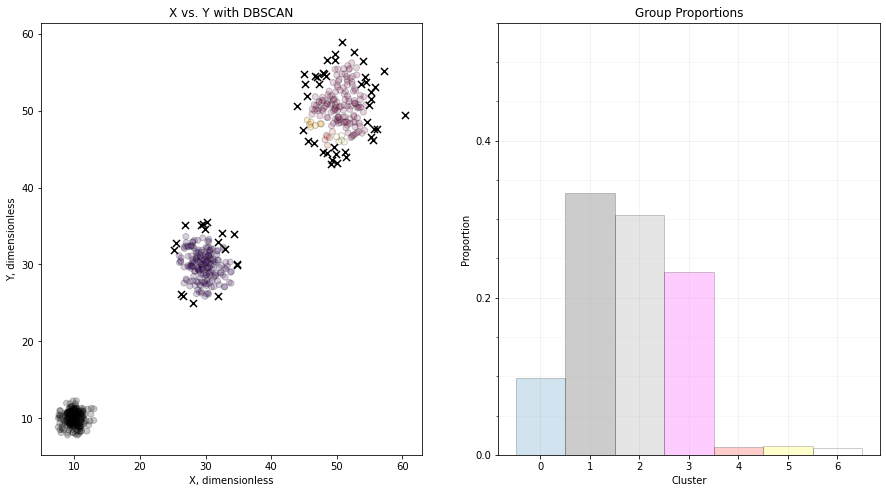

In [5]:
dbscan = DBSCAN(eps=1, min_samples=5).fit(df.values)
df['DBSCAN'] = dbscan.labels_ + 1

plt.subplot(131)                          
df_in = df.loc[(df['DBSCAN'] != 0)]
plt.scatter(df_in[col[0]], df_in[col[1]], c=df_in['DBSCAN'], alpha=0.2, edgecolor='k', cmap = cmap)
df_outlier = df.loc[(df['DBSCAN'] == 0)]
plt.scatter(df_outlier[col[0]],df_outlier[col[1]],c='black',s = 50,marker = 'x',edgecolor='k',cmap = cmap)
plt.title(col[0] + ' vs. ' + col[1] + ' with DBSCAN'); plt.xlabel(xlabel); plt.ylabel(ylabel)

plt.subplot(132)
N, bins, patches  = plt.hist(df['DBSCAN'],alpha=0.2,edgecolor="black",bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5],range=[0.5,2.5],density = True)
patches[1].set_facecolor('black'); patches[3].set_facecolor('magenta'); patches[4].set_facecolor('red')
patches[5].set_facecolor('yellow'); patches[6].set_facecolor('white'); patches[2].set_facecolor('gray');
plt.title('Group Proportions')
plt.xlabel('Cluster')
plt.ylabel("Proportion")
ax = plt.gca()
ax.set_xticks(np.arange(0.0, 6.1, 1))
ax.set_yticks(np.arange(0, 0.6, 0.2))
ax.set_yticks(np.arange(0, 0.6, 0.05), minor=True)

#plt.grid(which = 'both',color = 'black',alpha = 0.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.2)
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.50, wspace=0.2, hspace=0.2)

The DBSCAN plot above shows the result when using the nearest neighbor method to estimate the hyperparameter, eps, for varrying variance. Upon ocular inspection, DBSCAN is overfit for data group 1 where not a single outlier is observed. The fit is very good for data group 2, but there are a large number of cluster misclassifications and outliers for data group 3. 

### Investigating DBSCAN for Varrying Radii and Minimum Number of Samples

To correct for the issue above, DBSCAN will be run and visualized for various hyperparameters (eps/min number of samples) and ocular inspection will be used to determine the best fit. I used radii (eps) of 1, 2, and 2.5. I used minimum number of sample values of 3, 5, and 7. Each of these results will then be plotted. 

The following code block is from Professor Michael Pyrcz (@GeostatsGuy), SubsurfaceDataAnalytics_advanced_clustering.ipynb from GeostatsGuy GitHub.

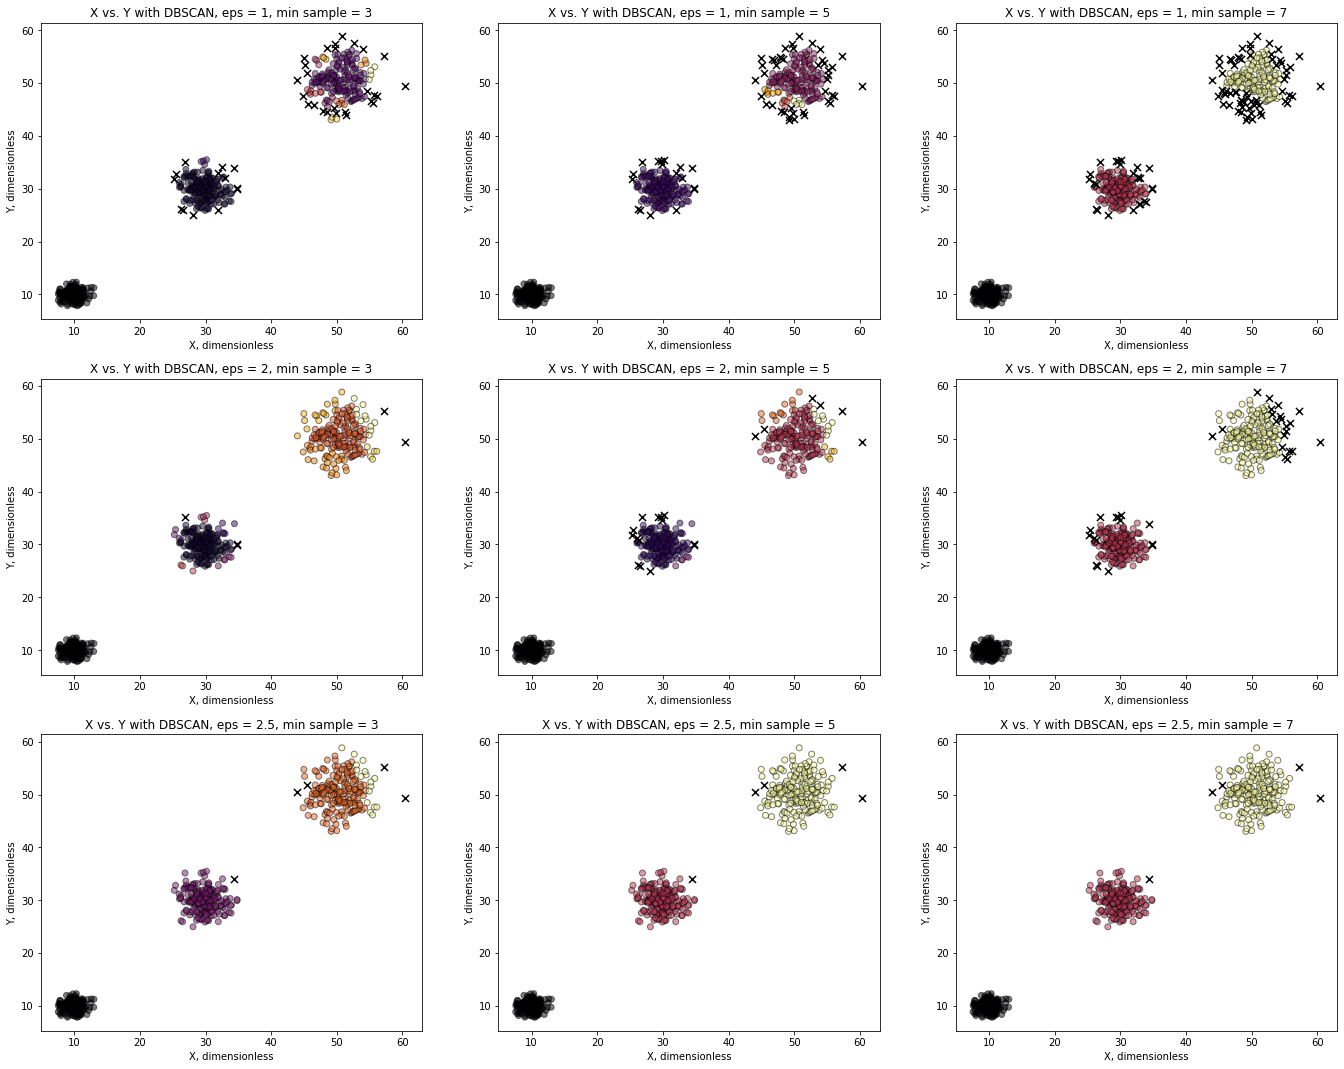

In [6]:
eps_mat = [1,2,2.5] 
min_sample_mat = [3, 5, 7]

index = 1
for eps in eps_mat:
    for min_sample in min_sample_mat:
        dbscan = DBSCAN(eps=eps, min_samples=min_sample).fit(df.values)
        df['DBSCAN'] = dbscan.labels_ + 1
        
        plt.subplot(3,3,index)                          
        df_in = df.loc[(df['DBSCAN'] != 0)]
        plt.scatter(df_in[col[0]], df_in[col[1]], c=df_in['DBSCAN'], alpha=0.5, edgecolor='k', cmap = cmap)
        df_outlier = df.loc[(df['DBSCAN'] == 0)]
        plt.scatter(df_outlier[col[0]],df_outlier[col[1]],c='black',s = 50,marker = 'x',edgecolor='k',cmap = cmap)
        plt.title(col[0] + ' vs. ' + col[1] + ' with DBSCAN, eps = ' + str(eps) + ', min sample = ' + str(min_sample)); plt.xlabel(xlabel); plt.ylabel(ylabel)
       
        index = index + 1
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.50, wspace=0.2, hspace=0.2)

The top left plot above has the same hyperparameters as the initial DBSCAN plot assuming constant variance for reference. A large value for the minimum number of samples was required for group 3 to be categorized into only one cluster.  

If we had to choose 1 radius/minimum number of samples for the entire dataframe, I would suggest a radius of 2 with a minimum number of samples at 7. This combination keeps data group 3 to one cluster while still recognizing outliers in group 2. However, with this decision, group 1 is still overfit. Based on these results, even the best combination of hyperparameters will result in overfit for group 1. In obvious and extreme cases such as this, it might be more efficient to separate the groups and use DBSCAN separately.

### Part 2, DBSCAN As Data Groups Converge

In this section, DBSCAN will be stress tested as the average feature X value for two datasets converge.

I will use data group 1 from the first part of the project, and create a new data group that will be converging towards group 1. In addition, the variance for gropu 2 is larger than that of group 1. This section also includes the DBSCAN visualizations for the converging groups. DBSCAN hyperparameters will be kept constant to aid in simplicity (eps = 0.8, min_samples = 5).

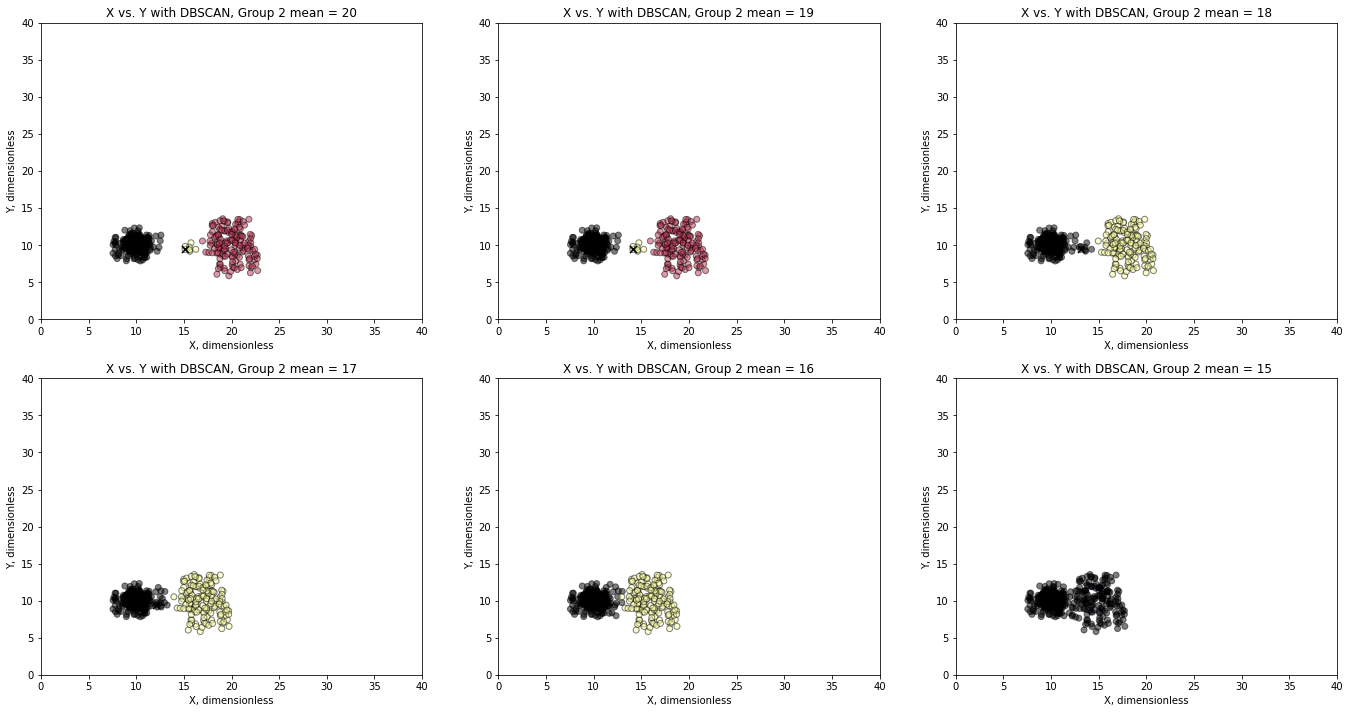

In [7]:
#Initializing Necessary Variables for Data Group 2 - Constant Y mean, Variance in the X mean.
np.random.seed(105)
M5Y = 10
std5 = 2
Y5 = np.random.normal(M5Y, std5, (200))  

#Toggles for Investigation
eps = 0.8
min_samples = 5
M5X_mat = [20, 19, 18, 17, 16, 15]

index = 1
for M5X in M5X_mat:
    #Creation of Data Group 2
    np.random.seed(210)                       
    X5 = np.random.normal(M5X, std5, (200))
    df5 = pd.DataFrame({'X': X5, 'Y': Y5})
    #Set of Code Used For Combining the Data Groups into One Data Frame, df6
    df6 = df1.append(df5, ignore_index=True) 
    
    #DBSCAN
    dbscan = DBSCAN(eps = eps, min_samples = min_samples).fit(df6.values)
    df6['DBSCAN'] = dbscan.labels_ + 1
    
    #Plotting result
    plt.subplot(3,3,index)                          
    df_in = df6.loc[(df6['DBSCAN'] != 0)]
    plt.scatter(df_in[col[0]], df_in[col[1]], c=df_in['DBSCAN'], alpha=0.5, edgecolor='k', cmap = cmap)
    df_outlier = df6.loc[(df['DBSCAN'] == 0)]
    plt.scatter(df_outlier[col[0]],df_outlier[col[1]],c='black',s = 50,marker = 'x',edgecolor='k',cmap = cmap)
    plt.title(col[0] + ' vs. ' + col[1] + ' with DBSCAN, Group 2 mean = ' + str(M5X)); plt.xlabel(xlabel); plt.ylabel(ylabel)
    plt.xlim(0, 40)
    plt.ylim(0, 40)    
    index = index + 1
   
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.50, wspace=0.2, hspace=0.2)

In this scenario, DBSCAN has already misclassified a small cluster in group 2. When the feature X mean for group two is at 18, the second cluster is once again misclassified into group 1. In a real case scenario, it is quite possible this error would not have been observed resulting in misclassification for those points. With that being said, the two groups didn't combine into a single cluster until the feature X averages were within 5. 

### Project Summary, Future Research
In Part 1 of this project, the hyperparameters were chosen by limiting the misclassified clusters for group 3 resulting in an extreme overfit for group 1. A future research study could be completed to determine the optimal hyperparameters for datagroups with known variances. This could be coupled with how to properly weight the chosen hyperparameters when dealing with dataframes similar to the one seen in this project with nonstationary variance. 

Part 2 of this project demonstrated the constraints of DBSCAN for data groups with similar feature values. The limitation of this study is that the DBSCAN hyperparameters were constant. A future study could be to tune DBSCAN hyperparameters for datagroups with similar feature values to ensure correct cluster categorization.  

### Post Project Comments
I hope this was a helpful tool for diving into DBSCAN's functionality and limitations.  Again, my name is Sam Laudon, and I am a graduate student at the University of Texas at Austin. Feel free to reach out to me at slaudon@utexas.edu if you would like to connect.